# Demo for using the source file

This notebook aims to reproduce the figure 2 in Abbasi yadkori et.al 2011

Reminds: I cannot find the setting of regularization coefficient $\lambda$ in the paper. I just set it as 0.1

In [1]:
# import pacakges
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

from Source.env import Env_FixedActionSpace
from Source.agent import OFUL_Agent, ConfidenceBall_Agent

In [2]:
# setting of the numeric experiment
T = 5000
n_experiment = 5

R = 0.1
L = 1
S = 1
delta = 0.0001
lambda_ = 0.1

In [3]:
# conduct the experiment
reward_oful = np.zeros((n_experiment, T))
reward_confidenceball = np.zeros((n_experiment, T))
for exp_index in range(n_experiment):
    np.random.seed(exp_index)
        
    # generate theta, we assume the theta is always inside the unitball of 2-d space
    theta = np.random.uniform(low=0.0, high=1.0, size=2)
    theta = theta / np.linalg.norm(theta)
    print(f"theta {theta}")
    print(f"{exp_index+1}-begins")
    time.sleep(1)
    
    # conduct the experiment, OFUL
    oful_agent = OFUL_Agent(R=R, L=L, S=S, delta=delta, lambda_=lambda_)
    env = Env_FixedActionSpace(theta=theta, R=R, random_seed=exp_index)
    for round_index in tqdm(range(T)):
        action = oful_agent.action()
        reward_mean, reward_real = env.response(action)
        oful_agent.update(reward_real)
        reward_oful[exp_index, round_index] = reward_mean
        
    # conduct the experiment, confidence ball
    confidenceball_agent = ConfidenceBall_Agent(delta=delta)
    env = Env_FixedActionSpace(theta=theta, R=R, random_seed=exp_index)
    for round_index in tqdm(range(T)):
        action = confidenceball_agent.action()
        reward_mean, reward_real = env.response(action)
        confidenceball_agent.update(reward_real)
        reward_confidenceball[exp_index, round_index] = reward_mean

theta [0.60878196 0.79333759]
1-begins


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:14<00:00, 353.98it/s]


theta [0.5010291  0.86543043]
2-begins


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:14<00:00, 347.69it/s]


theta [0.99823666 0.05935967]
3-begins


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:11<00:00, 435.34it/s]


theta [0.61395191 0.78934343]
4-begins


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:13<00:00, 370.07it/s]


theta [0.87031207 0.49250066]
5-begins


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:14<00:00, 352.38it/s]


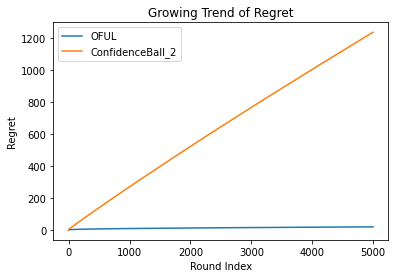

In [4]:
# plot the result
reward_oful_average = np.mean(reward_oful, axis=0)
reward_confidenceball_average = np.mean(reward_confidenceball, axis=0)
regret_oful = np.arange(1, T+1) - np.cumsum(reward_oful_average)
regret_confidenceball = np.arange(1, T+1) - np.cumsum(reward_confidenceball_average)

plt.figure()
plt.plot(regret_oful, label="OFUL")
plt.plot(regret_confidenceball, label="ConfidenceBall_2")
plt.title("Growing Trend of Regret")
plt.xlabel("Round Index")
plt.ylabel("Regret")
plt.legend()
plt.show()

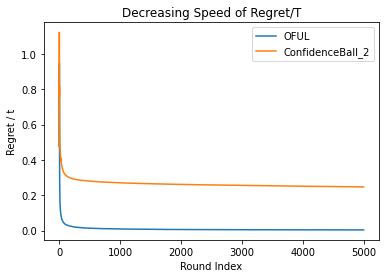

In [5]:
# plot the result
plt.figure()
plt.plot(regret_oful / np.arange(1, T+1), label="OFUL")
plt.plot(regret_confidenceball / np.arange(1, T+1), label="ConfidenceBall_2")

plt.title("Decreasing Speed of Regret/T")
plt.xlabel("Round Index")
plt.ylabel("Regret / t")

plt.legend()
plt.show()